In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:\\Users\\exsxaxr\\Downloads\\Input Data Synthetic.xlsx")

In [3]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [4]:
df['Assignment group'].value_counts(ascending=True)

GRP_61       1
GRP_73       1
GRP_64       1
GRP_35       1
GRP_70       1
          ... 
GRP_9      252
GRP_12     257
GRP_24     289
GRP_8      661
GRP_0     3975
Name: Assignment group, Length: 74, dtype: int64

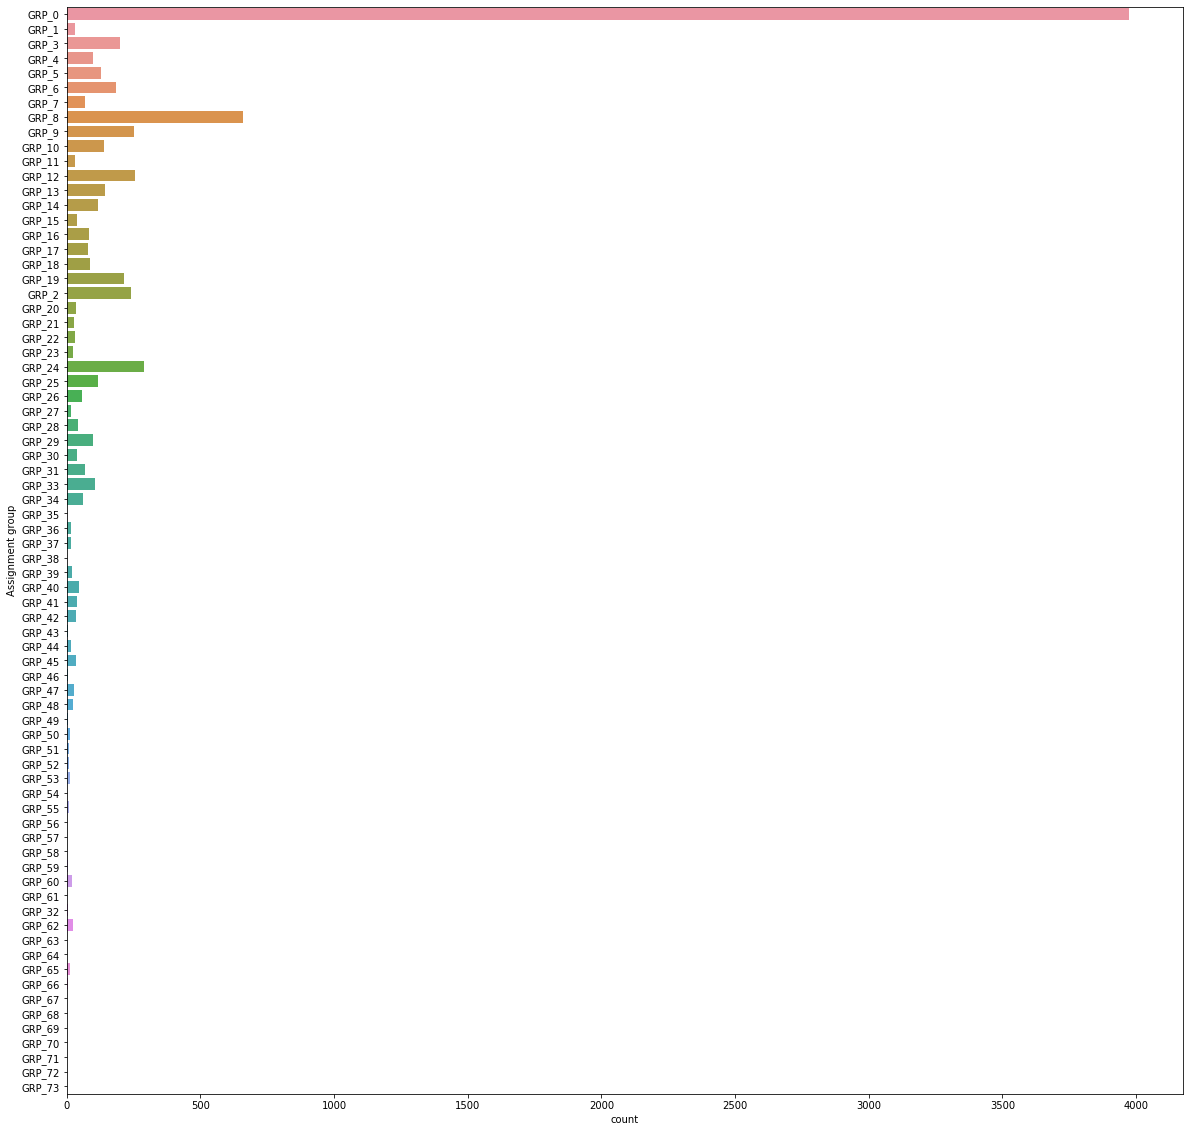

In [5]:
plt.figure(figsize=(20,20))
sns.countplot(y=df['Assignment group'])

In [6]:
df = df.drop(['Caller'], axis=1)

In [7]:
df.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


In [8]:
df[df.isnull().any(axis=1)]

,Short description,Description,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,GRP_0


In [9]:
# Replacing NaN values with stopword 'the'

df['Short description'].fillna('the', inplace=True)

In [10]:
df.shape

(8499, 3)

In [11]:
df['Description'] = df['Description'].astype(str)
df['Short description'] = df['Short description'].astype(str)

In [12]:
# Remove email id from description

import re
df['Description'] = df['Description'].apply((lambda x: re.sub('received from:.\S+@\S+','',x)))

In [13]:
# Remove words that are not relevant

df['Description'] = df['Description'].apply((lambda x: re.sub('hi|hello|team|','',x)))

In [14]:
# Convert into lower case and remove special charecters

df['Description'] = df['Description'].apply(lambda x: x.lower())
df['Description'] = df['Description'].apply((lambda x: re.sub('[^a-zA-Z0-9\s]','',x)))

df['Short description'] = df['Short description'].apply(lambda x: x.lower())
df['Short description'] = df['Short description'].apply((lambda x: re.sub('[^a-zA-Z0-9\s]','',x)))

In [15]:
# Find length of words in description and short description columns

df['Desc_len'] = df['Description'].apply(lambda x: len(x.split(" ")))
df['Short_desc_len'] = df['Short description'].apply(lambda x: len(x.split(" ")))
df.head()

,Short description,Description,Assignment group,Desc_len,Short_desc_len
0,login issue,verified user detailsemployee manager name\r\...,GRP_0,29,2
1,outlook,\r\n\r\n\r\n\r\n \r\n\r\nmy meetingsskype meet...,GRP_0,21,1
2,cant log in to vpn,\r\n\r\n\r\n\r\n\r\n\r\ni cannot log on to vpn...,GRP_0,7,5
3,unable to access hrtool page,unable to access hrtool page,GRP_0,5,5
4,skype error,skype error,GRP_0,3,3


In [16]:
# Remove Punctuation

import string
df['Short description']  = df['Short description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
df['Description']  = df['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

In [17]:
# Remove white spaces

df['Short description'] = df['Short description'].map(lambda x: x.strip())
df['Description'] = df['Description'].map(lambda x: x.strip())

In [18]:
df.head()

,Short description,Description,Assignment group,Desc_len,Short_desc_len
0,login issue,verified user detailsemployee manager name\r\...,GRP_0,29,2
1,outlook,my meetingsskype meetings etc are not appearin...,GRP_0,21,1
2,cant log in to vpn,i cannot log on to vpn\r\n\r\nbest,GRP_0,7,5
3,unable to access hrtool page,unable to access hrtool page,GRP_0,5,5
4,skype error,skype error,GRP_0,3,3


In [19]:
from nltk import word_tokenize

df['Short description'] = df['Short description'].map(lambda x: word_tokenize(x))
df['Description'] = df['Description'].map(lambda x: word_tokenize(x))

In [20]:
df.head()

,Short description,Description,Assignment group,Desc_len,Short_desc_len
0,"[login, issue]","[verified, user, detailsemployee, manager, nam...",GRP_0,29,2
1,[outlook],"[my, meetingsskype, meetings, etc, are, not, a...",GRP_0,21,1
2,"[cant, log, in, to, vpn]","[i, can, not, log, on, to, vpn, best]",GRP_0,7,5
3,"[unable, to, access, hrtool, page]","[unable, to, access, hrtool, page]",GRP_0,5,5
4,"[skype, error]","[skype, error]",GRP_0,3,3


In [21]:
# filter out stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['Short description'] = df['Short description'].map(lambda x: [w for w in x if not w in stop_words])
df['Description'] = df['Description'].map(lambda x: [w for w in x if not w in stop_words])

In [22]:
# Word Lemmatization

from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
df['Short description'] = df['Short description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
df['Description'] = df['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

In [23]:
df.head()

,Short description,Description,Assignment group,Desc_len,Short_desc_len
0,"[login, issue]","[verify, user, detailsemployee, manager, name,...",GRP_0,29,2
1,[outlook],"[meetingsskype, meet, etc, appear, outlook, ca...",GRP_0,21,1
2,"[cant, log, vpn]","[log, vpn, best]",GRP_0,7,5
3,"[unable, access, hrtool, page]","[unable, access, hrtool, page]",GRP_0,5,5
4,"[skype, error]","[skype, error]",GRP_0,3,3


In [24]:
df_description = df['Description'].values

In [25]:
from wordcloud import WordCloud

val = str(df_description)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(val)

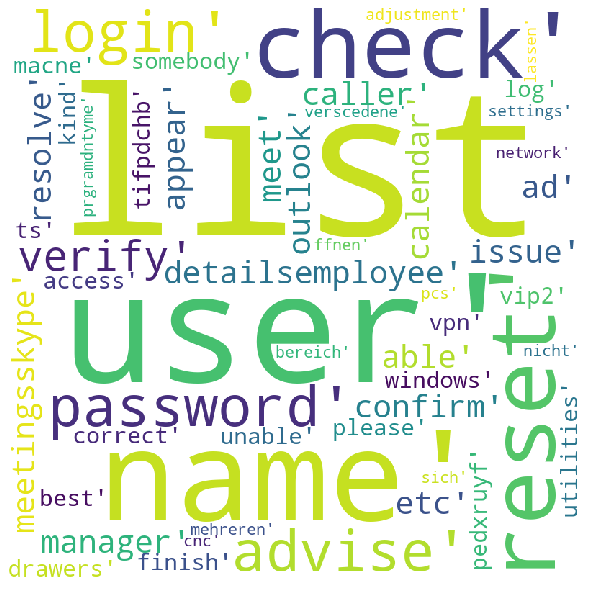

In [26]:
# plot the WordCloud image       

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [27]:
df.head()

,Short description,Description,Assignment group,Desc_len,Short_desc_len
0,"[login, issue]","[verify, user, detailsemployee, manager, name,...",GRP_0,29,2
1,[outlook],"[meetingsskype, meet, etc, appear, outlook, ca...",GRP_0,21,1
2,"[cant, log, vpn]","[log, vpn, best]",GRP_0,7,5
3,"[unable, access, hrtool, page]","[unable, access, hrtool, page]",GRP_0,5,5
4,"[skype, error]","[skype, error]",GRP_0,3,3


In [28]:
# Turn lists back to string

df['Short description'] = df['Short description'].map(lambda x: ' '.join(x))
df['Description'] = df['Description'].map(lambda x: ' '.join(x))

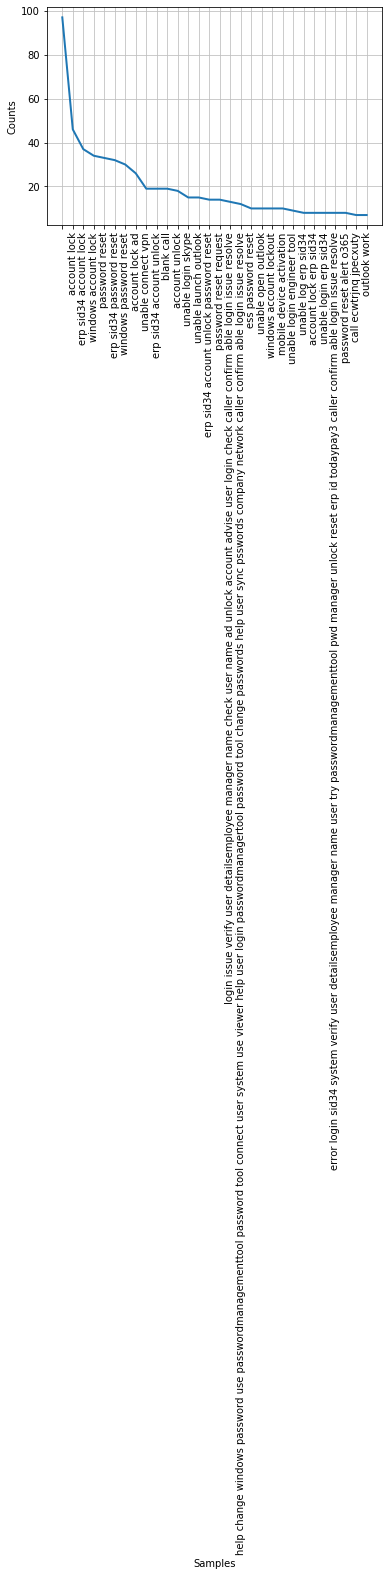

In [29]:
from nltk.probability import FreqDist
fdist = FreqDist(df['Description'])
#print(fdist)

fdist.most_common(5)

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [30]:
df.head()

,Short description,Description,Assignment group,Desc_len,Short_desc_len
0,login issue,verify user detailsemployee manager name check...,GRP_0,29,2
1,outlook,meetingsskype meet etc appear outlook calendar...,GRP_0,21,1
2,cant log vpn,log vpn best,GRP_0,7,5
3,unable access hrtool page,unable access hrtool page,GRP_0,5,5
4,skype error,skype error,GRP_0,3,3


In [31]:
df['Assignment group'] = df['Assignment group'].astype('category').cat.codes

In [32]:
df.head()

,Short description,Description,Assignment group,Desc_len,Short_desc_len
0,login issue,verify user detailsemployee manager name check...,0,29,2
1,outlook,meetingsskype meet etc appear outlook calendar...,0,21,1
2,cant log vpn,log vpn best,0,7,5
3,unable access hrtool page,unable access hrtool page,0,5,5
4,skype error,skype error,0,3,3


In [33]:
df['Description'] = df['Short description'].str.cat(df['Description'], sep =" ")

In [34]:
df = df.drop(['Short description', 'Short_desc_len'], axis=1)

In [35]:
df['Desc_len'] = df['Description'].apply(lambda x: len(x.split(" ")))

In [36]:
df.head()

,Description,Assignment group,Desc_len
0,login issue verify user detailsemployee manage...,0,23
1,outlook meetingsskype meet etc appear outlook ...,0,13
2,cant log vpn log vpn best,0,6
3,unable access hrtool page unable access hrtool...,0,8
4,skype error skype error,0,4


In [44]:
# Vectorizing text features using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features_description = tfidf_desc.fit_transform(df.Description).toarray()

print('Description Features Shape: ' + str(features_description.shape))

Description Features Shape: (8499, 5556)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['Assignment group'], random_state = 0)

X_train_desc_features = tfidf_desc.transform(X_train).toarray()

In [49]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

# Define LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(74, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1500, 100)         2000000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 1500, 100)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 74)                7474      
Total params: 2,087,874
Trainable params: 2,087,874
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
# Training LSTM Model
epochs = 5
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

ValueError: Error when checking input: expected embedding_2_input to have shape (1500,) but got array with shape (1,)